# Explore data

Load dependencies.

In [3]:
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
import numpy as np
import glob

Load metadata for the articles that matched my phrase queries (the data collected in query_nyt.ipynb).

In [6]:
phrase_data = pd.read_csv('data/all.csv')
phrase_data['keywords'] = phrase_data['keywords'].apply(literal_eval)
phrase_data['date'] = pd.to_datetime(phrase_data['date']) 
phrase_data

,headline,date,doc_type,material_type,news_desk,section,keywords,url,id,byline,deaf_and_dumb,deaf_mute,fell_on_deaf_ears,hearing_impaired,tone_deaf,deaf_as_a_post,stone_deaf,deaf
0,THE DEAF AND DUMB WAITER.,1885-12-03,article,Archives,None,Archives,[],https://www.nytimes.com/1885/12/03/archives/th...,nyt://article/0074c23c-1ff6-5bc7-85d9-e56a5af3...,NaN,True,False,False,False,False,False,False,False
1,Chad Threatens to Expel Sudanese Refugees,2006-04-14,article,News,International,World,[],https://www.nytimes.com/2006/04/14/world/chad-...,nyt://article/00bb19d7-2ba6-5072-8e6b-3159730d...,By Marc Lacey,True,False,False,False,False,False,False,False
2,WELFARE HOTEL CHILDREN: TOMORROW'S POOR,1987-07-16,article,News,Metropolitan Desk,New York,"[Homeless Persons, HOTELS AND MOTELS, Children...",https://www.nytimes.com/1987/07/16/nyregion/we...,nyt://article/01670df3-ae07-5eb6-8862-7bd834bf...,By Lydia Chavez,True,False,False,False,False,False,False,False
3,Wal-Mart Says Oil Prices Held Down Profits for...,2005-08-16,article,News,Business,Business Day,[Company Reports],https://www.nytimes.com/2005/08/16/business/wa...,nyt://article/0175ac61-cc62-5cdc-923c-f5efb8ec...,By Roben Farzad,True,False,False,False,False,False,False,False
4,"A Space Force? The Idea May Have Merit, Some Say",2018-06-23,article,News,Washington,U.S.,"[Space and Astronomy, United States Defense an...",https://www.nytimes.com/2018/06/23/us/politics...,nyt://article/01b8b8a5-7d0c-592a-a283-a9ccd3d8...,By Helene Cooper,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17340,Your Money; Claiming a Pet As a Deduction,1981-03-28,article,News,Financial Desk,Business Day,"[ANIMALS, Taxation, Income Tax, Handicapped]",https://www.nytimes.com/1981/03/28/business/yo...,nyt://article/8aa2aceb-e543-5691-b4cc-572cfada...,By Elizabeth M. Fowler,False,False,False,True,False,False,False,True
17341,"Your Typical Crowded, Swinging, Silent Bar Scene",1994-10-30,article,News,The City Weekly Desk,New York,"[Deafness, Bars]",https://www.nytimes.com/1994/10/30/nyregion/ne...,nyt://article/1aab92b9-5b05-50b7-bf7a-2b8cef19...,By Jennifer Kingson Bloom,False,False,False,True,False,False,False,True
17342,"‘Fargo’ Recap: Dead Dogs, Spiders and Pestilence",2014-04-30,article,News,Culture,Arts,[],https://artsbeat.blogs.nytimes.com/2014/04/29/...,nyt://article/3a6161c6-023a-5968-a28e-0ea2ecb6...,By Kate Phillips,False,False,False,True,False,False,False,True
17343,‘Singing’ With Their Hands,2012-02-11,article,News,Styles,Fashion & Style,"[Video Recordings and Downloads, Music, Sign L...",https://www.nytimes.com/2012/02/12/fashion/sin...,nyt://article/0918d106-bd33-59fe-a100-cd3f9a23...,By Austin Considine,False,False,False,True,False,False,False,True


In [66]:
phrases = phrase_data.columns[10:].tolist()
phrases

['deaf_and_dumb',
 'deaf_mute',
 'fell_on_deaf_ears',
 'hearing_impaired',
 'tone_deaf',
 'deaf_as_a_post',
 'stone_deaf',
 'deaf']

## Graph deaf articles as a ratio of total articles 

Load metadata for ALL articles. (Note: This data is missing ids and sections! This would need to be collected again.)

In [ ]:
all_files = glob.glob("../headlines/*.csv")
all_data = pd.concat((pd.read_csv(f) for f in all_files))
all_data['date'] = pd.to_datetime(all_data['date']) # sets format of "date" column as datetime
all_data = all_data[all_data['headline'].notna()].drop_duplicates().sort_values(by='date') 
all_data['keywords'] = all_data['keywords'].apply(literal_eval)
all_data.reset_index(inplace=True, drop=True)
all_data

Check that the full dataset contains all of our phrase dataset. 

In [ ]:
phrase_data[~phrase_data['headline'].isin(all_data['headline'])]

## Graph phrase count over the years

Define functions

In [68]:
def generate_xy(df, phrase=None):
    if phrase and phrase in df.columns: #secnod condition allows us to query and title 'all' without it looking for a column
        df = df[df[phrase]]
    years = df.groupby(df['date'].dt.year).count().reindex(list(range(1852, 2021)), fill_value=0)
    x = years.index 
    y = years['headline']
    return x, y

Generate a graph for each phrase.

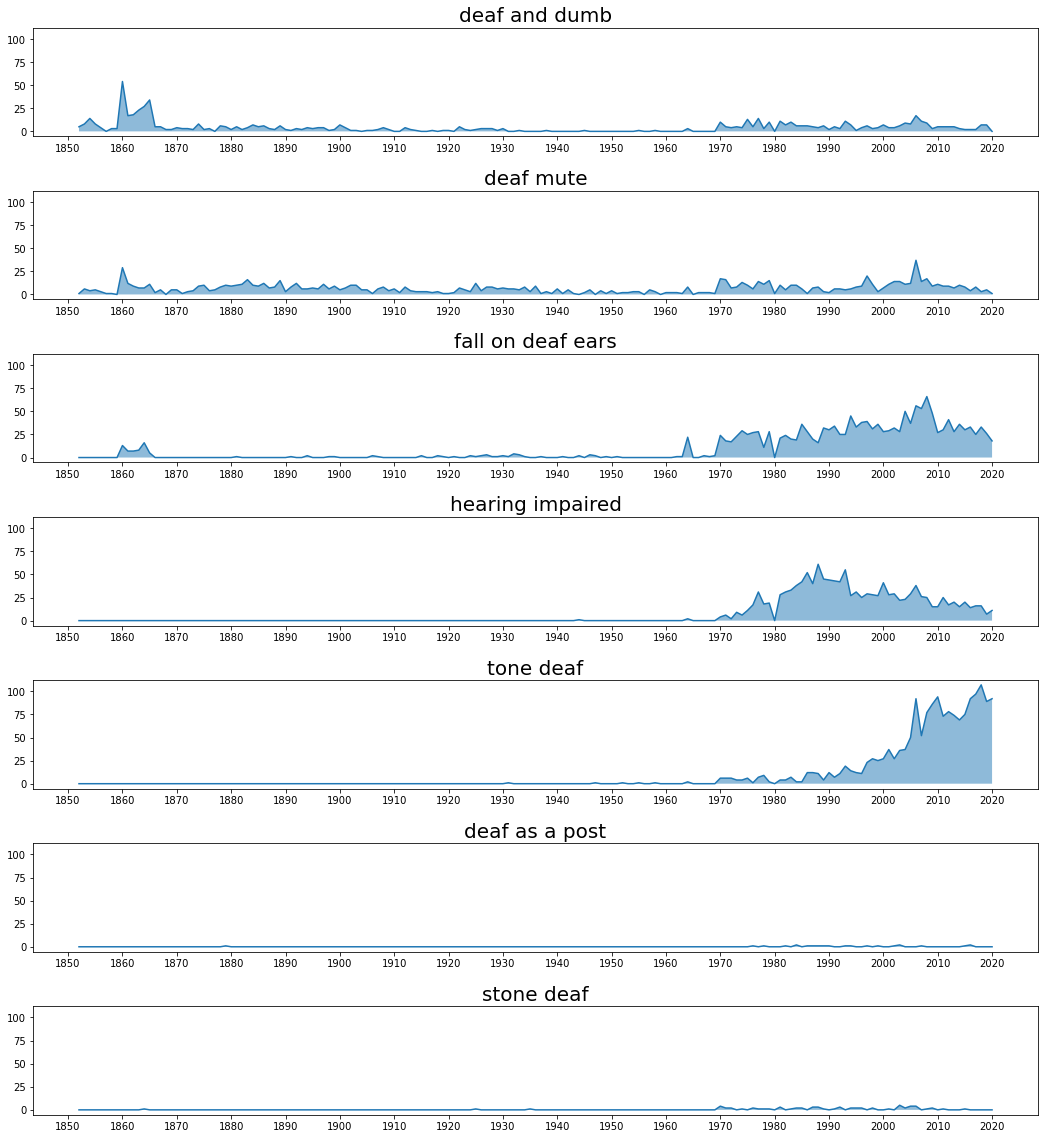

In [66]:
fig, axarr = plt.subplots(nrows=len(phrases)-1, ncols=1, figsize=(18, 20), sharey=True)
fig.subplots_adjust(hspace=0.5, wspace=0)

for i, ax in enumerate(axarr.reshape(-1)):
    ax.set_title(phrases[i].replace('_', ' '), fontsize=20)
    x, y = generate_xy(phrase_data, phrases[i])
    ax.plot(x, y)
    ax.fill_between(x, y, alpha=0.5)
    ax.set_xticks(np.arange(1850, max(x)+1, 10))

plt.show()

I took out "deaf" from this because its y axis is much larger. It can be graphed alone.

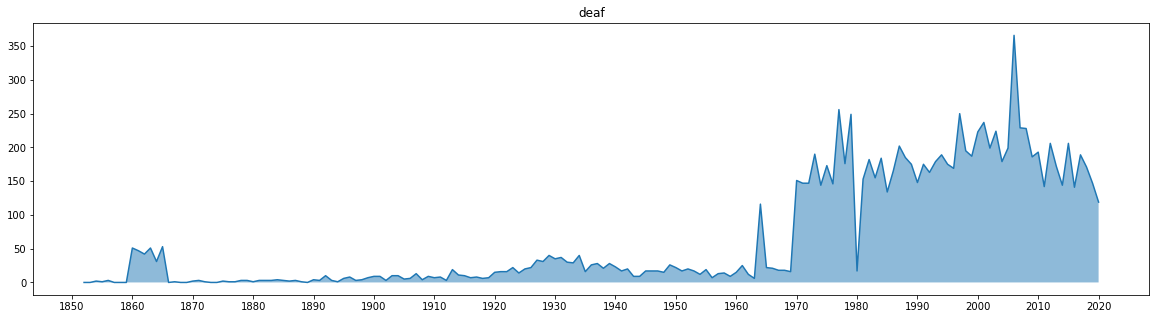

In [67]:
phrase = phrases[-1]
x, y = generate_xy(phrase_data, phrase)
plt.figure(figsize=(20, 5))
plt.plot(x, y)
plt.fill_between(x, y, alpha=0.5)
plt.title(phrase)
plt.xticks(np.arange(1850, max(x)+1, 10))
plt.show()

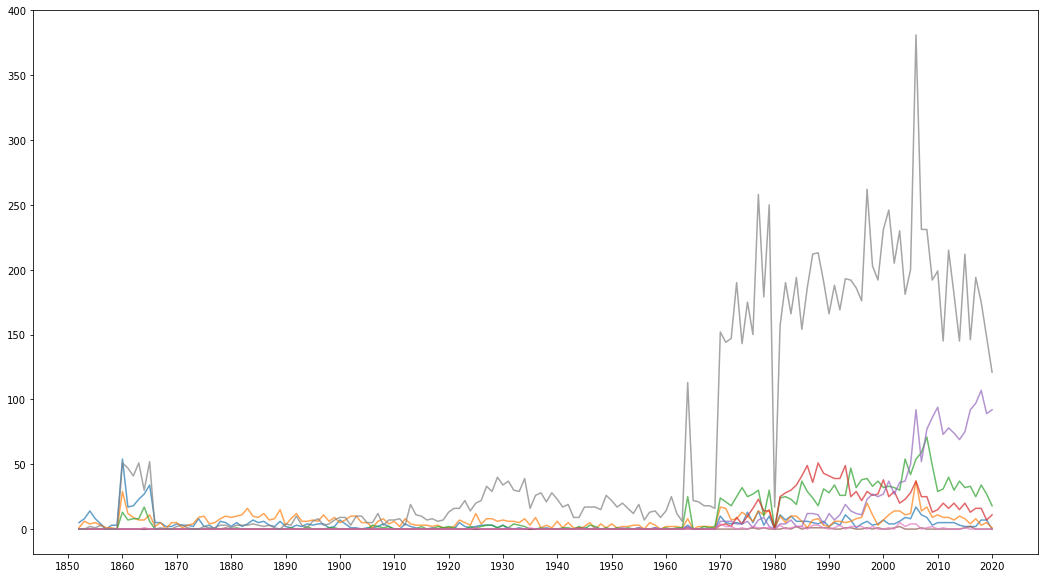

In [82]:
plt.figure(figsize=(18, 10))

for phrase in phrases:
    x, y = generate_xy(phrase_data, phrase)
    plt.plot(x, y, alpha=0.7)
    #plt.fill_between(x, y, alpha=0.5)

plt.xticks(np.arange(1850, max(x)+1, 10))
plt.show()

In [94]:
y_vals = []
for phrase in phrases:
    x, y = generate_xy(phrase_data, phrase)
    y_vals.append(y.values)
y_vals

[array([ 5,  8, 14,  8,  4,  0,  3,  3, 54, 17, 18, 23, 27, 34,  5,  5,  2,
         2,  4,  3,  3,  2,  8,  2,  3,  0,  6,  5,  2,  5,  2,  4,  7,  5,
         6,  3,  2,  6,  2,  1,  3,  2,  4,  3,  4,  4,  1,  2,  7,  4,  1,
         1,  0,  1,  1,  2,  4,  2,  0,  0,  4,  2,  1,  0,  0,  1,  0,  1,
         1,  0,  5,  2,  1,  2,  3,  3,  3,  1,  3,  0,  0,  1,  0,  0,  0,
         0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0, 10,
         5,  4,  5,  4, 13,  5, 14,  3, 10,  0, 11,  7, 10,  6,  6,  6,  5,
         4,  6,  2,  5,  3, 11,  7,  1,  4,  6,  3,  4,  7,  4,  4,  6,  9,
         8, 17, 11,  9,  3,  5,  5,  5,  5,  3,  2,  2,  2,  7,  7,  0]),
 array([ 1,  6,  4,  5,  3,  1,  1,  0, 29, 12,  9,  7,  7, 11,  2,  5,  0,
         5,  5,  1,  3,  4,  9, 10,  4,  5,  8, 10,  9, 10, 11, 16, 10,  9,
        12,  7,  8, 15,  3,  8, 12,  6,  6,  7,  6, 11,  6,  9,  5,  7, 10,
        10,  5

Text(0.5, 0.98, 'My panel chart')

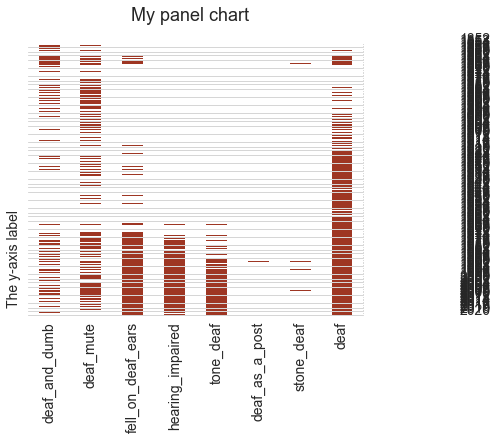

In [98]:
import seaborn as sns

cols = ['col'+str(i) for i in range(10)]
ind = ['ind'+str(i) for i in range(10)]
df = pd.DataFrame(y_vals, index=phrases, columns=x)

#create plot
sns.set_style("whitegrid")
axs = df.plot(kind='bar', subplots=True, sharey=True, 
              figsize=(6, 5), legend=False, yticks=[], 
              grid=False, ylim=(0, 14), edgecolor='none', 
              fontsize=14, color=[sns.xkcd_rgb["brownish red"]])
plt.text(-1, 100, "The y-axis label", fontsize=14, rotation=90)  # add a y-label with custom positioning
sns.despine(left=True)  # get rid of the axes
for ax in axs:  # set the names beside the axes
    #ax.lines[0].set_visible(False)  # remove ugly dashed line
    ax.set_title('')
    sername = ax.get_legend_handles_labels()[1][0]
    ax.text(9.8, 5, sername, fontsize=14)
plt.suptitle("My panel chart", fontsize=18)

## Keywords

### Most common keywords

In [59]:
def get_top_keywords(df):
    counts = pd.Series(x.lower() for l in df['keywords'] for x in l).value_counts(ascending=False)
    return counts

keywords = get_top_keywords(phrase_data[phrase_data['hearing_impaired']])

In [63]:
for keyword in keywords.keys():
    print(keyword + ' ' + str(keywords[keyword]))

deafness 222
handicapped 105
ears and hearing 69
theater 68
education and schools 61
television 58
children and youth 54
music 49
terms not available 46
motion pictures 45
hearing aids 43
biographical information 42
reviews 40
law and legislation 35
sign language 32
medicine and health 30
travel and vacations 26
discrimination 25
blindness 23
books and literature 23
no index terms 22
finances 22
computers and the internet 21
weddings and engagements 21
colleges and universities 21
dancing 21
noise 20
teachers and school employees 20
labor 20
disabilities 19
suits and litigation 18
research 17
deafness and deaf-mutes 17
housing 16
deaths (obituaries) 16
telephones 15
culture 14
aged 14
deaths 14
art 13
language and languages 12
entertainment and amusements 12
data processing (computers) 11
speech 11
television and radio 11
special education (handicapped) 11
movies 11
families and family life 11
philanthropy 10
news and news media 10
baseball 10
demonstrations and riots 9
telephones and 

### Whether the articles are actually about the deaf

## First & last articles for each phrase

In [13]:
for phrase in phrases:
    print('\nPhrase: ' + phrase)
    print('-----FIRST ARTICLE-----')
    phrase_subset = phrase_data[phrase_data[phrase]].sort_values('date', ascending=True)
    first_article = phrase_subset.iloc[0]
    print('Date: ' + str(first_article['date']))
    print('Headline: ' + first_article['headline'])
    
    print('-----LAST ARTICLE-----')
    last_article = phrase_subset.iloc[-1]
    print('Date: ' + str(last_article['date']))
    print('Headline: ' + last_article['headline'])


Phrase: deaf_and_dumb
-----FIRST ARTICLE-----
Date: 1852-05-14 00:00:00
Headline: Institution for the Deaf and Dumb.
-----LAST ARTICLE-----
Date: 2019-12-12 00:00:00
Headline: How ‘Survivor’ Failed Its #MeToo Test

Phrase: deaf_mute
-----FIRST ARTICLE-----
Date: 1852-09-29 00:00:00
Headline: DEAF MUTES.; The Statistics of the Class.
-----LAST ARTICLE-----
Date: 2020-01-16 00:00:00
Headline: Lorenza Mazzetti, Wartime Survivor and Seminal Filmmaker, Dies at 92

Phrase: fell_on_deaf_ears
-----FIRST ARTICLE-----
Date: 1860-01-13 00:00:00
Headline: Execution of Patrick Maude.; REMARKABLE SPEECH OF THE CRIMINAL UPON THE GALLOWS.
-----LAST ARTICLE-----
Date: 2020-09-08 00:00:00
Headline: As a University Spokesman, Can I Promote a Reopening Plan I Question?

Phrase: hearing_impaired
-----FIRST ARTICLE-----
Date: 1944-12-24 00:00:00
Headline: NOTES ON SCIENCE; New Resinous Coating Material -- Wide Hearing Impairment
-----LAST ARTICLE-----
Date: 2020-09-01 00:00:00
Headline: Face Shields and Va

## Sentences

### Most common words in sentences or headlines that contain the phrases

### Sentiment analysis of sentences

Because sentiment analysis is still an emerging field, no single solution or approach has won the market yet. Chose to use SpaCy for this.

In [51]:
phrase_data[phrase_data['date'].dt.year == 1884].iloc[-1].url

'https://www.nytimes.com/1884/02/02/archives/a-cure-for-deafness.html'